# 1. 추천 시스템 기법
## 1.1 개요
**추천 시스템 종류**
- Simple Aggregate
- Association Analysis, Content-based Recommendation
- Collaborative Filtering
- Item2Vec Recommendation and ANN
- Deep Learning-based Recommendation
- Context-aware Recommendation
- Multi-Armed Bandit(MAB) - based Recommendation

# 2. 연관 분석
## 2.1 개요
**연관 규칙 분석(Association Rule Analysis, Association Rule Mining)**

흔히 장바구니 분석 혹은 서열 분석이라고 불린다.

상품의 구매, 조회 등 하나의 연속된 거래들 사이의 규칙을 발견하기 위해 적용했다.
- ex) 맥주와 기저귀를 같이 구매하는 빈도가 얼마나 되는가?
- ex) 컴퓨터를 산 고객이 다음에 가장 많이 사는 상품은 무엇인가?

주어진 transaction(거래) 데이터에 대해서, 하나의 상품이 등장했을 때 상품이 같이 등장하는 규칙을 찾는 것
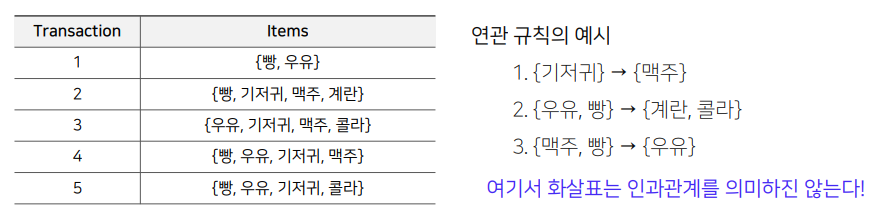

## 2.2 연관 규칙
**연관 규칙(Association Rule)과 Itemset**

규칙 : IF (condition) THEN (result)
- {condition} -> {result}의 형식으로 표현한다.


연관 규칙 : IF (antecedent) THEN (consequent)
- 특정 사건이 발생했을 때 함께 빈번하게(frequently) 발생하는 또 다른 사건의 규칙을 의미한다.


Item set : antecedent와 consequent 각각을 구성하는 상품들의 집합
- antecedent와 consequent는 disjoint(서로소)를 만족한다.
- ex) antecedent : {빵, 버터}, consequent : {우유}

**빈발 집합(Frequent Itemset)**

Itemset
- 1개 이상의 item의 집합(set), ex) {빵, 우유, 기저귀}
- K-itemset : k개의 item으로 이루어진 itemset


support count($\sigma$)
- 전체 transaction data에서 itemset이 등장하는 횟수
- $\sigma$({빵, 우유}) = 3


support
- itemset이 전체 transaction data에서 등장하는 비율
- support({빵, 우유}) = 3 / 5 = 0.6


frequent itemset
- 유저가 지정한 minimum support 값 이상의 itemset을 의미한다.
- infrequent itemset은 반대로 유저가 지정한 minimum support보다 작은 itemset을 의미한다.
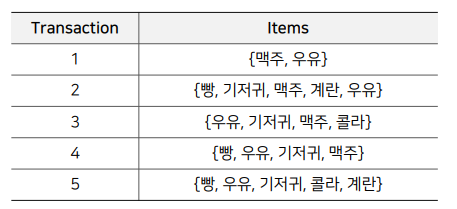

## 2.3 연관 규칙의 척도
**연관 규칙 척도 : support, confidence, lift**

frequent itemset들 사이의 연관 규칙을 만들기 위해서는 measurement가 필요하다.
- X -> Y 가 존재할 때, (X, Y : itemset, N : 전체 transaction 수)


1. support

: 두 itemset X, Y를 모두 포함하는 transaction의 비율. 즉, 전체 transaction에 대한 itemset의 확률값.
좋은 (빈도가 높거나, 구성 비율이 높은) 규칙을 찾거나, 불필요한 연산을 줄일 때 사용됨.
- $s(x) = \frac{n(X)}{N}$


- $s(X\to Y) = \frac{n(X\bigcup Y)}{N} = P(X\bigcap Y)$


2. confidence

: X가 포함된 transaction 가운데 Y도 포함하는 transaction 비율(Y의 X에 대한 조건부 확률). confidence가 높을수록 유용한 규칙을 뜻한다.
- $c(X\to Y) = \frac{n(X\bigcup Y)}{n(X)} = \frac{s(X\to Y)}{s(X)} = \frac{P(X\bigcap Y)}{P(X)} = P(Y|X)$


3. lift

: [X가 포함된 transaction 가운데 Y가 등장될 확률]/[Y가 등장할 확률]
- lift = 1 -> **X, Y**는 독립
- lift > 1 -> X, Y가 양의 상관관계를 가짐, lift < 1 -> X, Y가 음의 상관관계를 가짐.
- $l(X\to Y) = \frac{P(Y|X)}{P(Y)} = \frac{P(X\bigcap Y)}{P(X)P(Y)} = \frac{P(X\to Y)}{s(X)s(Y)} = \frac{c(X\to Y)}{s(Y)}$

**예시**
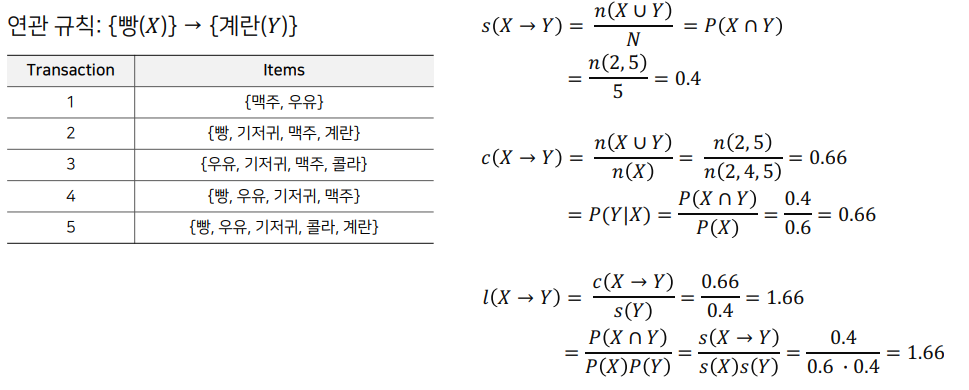

**사용방법**

Item의 수가 많아질수록, 가능한 itemset에 대한 rule의 수가 기하급수적으로 많아진다.
- 이 중 유의미한 rule만 사용해야 한다.


<사용법>
1. minimum support, minimum confidence로 의미 없는 rule을 screen out

: 전체 transaction 중에서 너무 적게 등장하거나, 조건부 확률이 아주 낮은 rule을 필터링 하기 위함

2. lift 값으로 내림차순 정렬을 하여 의미 있는 rule을 평가한다.

: lift가 크다는 것은 rule을 구성하는 antecedent와 consequent가 연관성이 높고 유의미하다는 뜻

**Example**
- $X, Y, Z$가 각각 와인, 오프너, 생수라고 하고 구매할 확률을 아래와 같이 정의해보면
- $P(Y|X) = 0.1$, $P(Z|X) = 0.2$
- 와인을 샀을 때 오프너 보다 물을 더 많이 산다고 생각한다.
- 물은 평소에 많이 구매하는 물품이기 때문에 단일 확률을 $P(Y)=0.01$,$P(Z)=0.2$ 라고 하면,
- lift 값을 계산하면 $X\to Y = 10$, $X\to Z = 1$이 되기 때문에 와인을 샀을 때 오프너를 추천 받아야 양질의 결과이다.

## 2.4 연관 규칙의 탐색
**Mining Association Rules** : 굉장히 중요하고 어렵다.

주어진 트랜잭션 가운데, 아래 조건을 만족하는 가능한 모든 연관 규칙을 찾는다.
- (support) >= (minimum support)
- (confidence) >= (minimum confidence)


Brute-force approach
- 가능한 모든 연관 규칙을 나열한다.
- 모든 연관 규칙에 대해 개별 support와 confidence를 계산한다.
- minimum support, confidence를 만족하는 rule만 남기고 모두 Pruning한다.
- 모든 연관 규칙을 찾아서 계산하려면 엄청나게 많은 계산량이 요구된다.

**Brute-force Approach**

개별 트랜잭션의 아이템들을 풀스캔하여 가능한 모든 itemset의 support를 계산한다.

*$Complexity \sim O(NWM),\ M = 2^d (d: \#\ of\ unique\ items)$*

=> **M이 가장 큰 문제이다.**
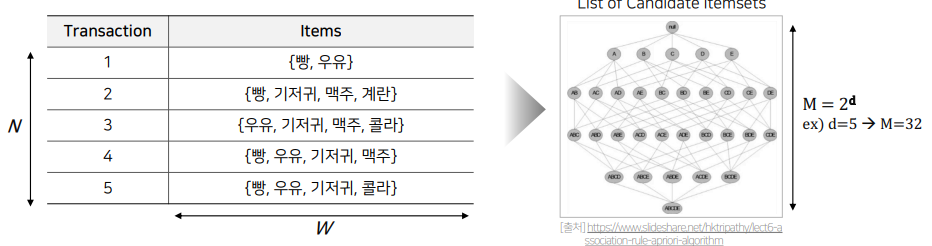

주어진 d개 unique item에 대해서, 전체 가능한 연관 규칙의 개수는 기하급수적으로 증가한다.
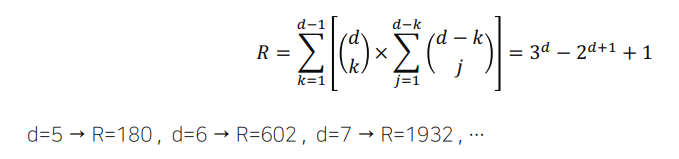

**효율적인 Association Rule Mining의 필요성**

Association Rule Mining을 하기 위해선 두 가지 스텝을 거쳐야 한다.

1. Frequent Itemset Generation
- minimum support 이상의 모든 itemset을 생성한다.


2. Rule Generation
- minimum confidence 이상의 association rule을 생성한다.
- 이때 rule을 이루는 antecedent와 consequent는 서로소를 만족해야 한다.

**Frequent Itermset Generation Strategies**

1. 가능한 후보 itemset의 개수를 줄인다.(M $\downarrow$)
- 완전 탐색 : $M = 2^d$
- Apriori 알고리즘 : 가지치기를 활용하여 탐색해야 하는 M을 줄인다.


2. 탐색하는 transaction의 숫자를 줄인다.(N $\downarrow$)
- itemset의 크기가 커짐에 따라 전체 N개 transaction보다 적은 개수를 탐색한다.
- DHP(Direct Hashing & Pruning) 알고리즘


3. 탐색 횟수를 줄인다.(NM $\downarrow$)
- 효율적인 자료구조를 사용하여 후보 itemset과 transaction을 저장한다.
- 모든 itemset과 transaction의 조합에 대해서 탐색할 필요가 없다.
- FP-Growth 알고리즘

# 3. TF-IDF를 활용한 컨텐츠 기반 추천
## 3.1 개요
**컨텐츠 기반 추천(Content-based Recommendation)**

기본 아이디어 : 유저 x가 과거에 선호한 아이템과 비슷한 아이템을 유저 x에게 추천

ex)
- 영화 : 배우, 감독, 영화 장르
- 음악 : 아티스트, 장르, 리듬 무드
- 블로그 / 뉴스 : 비슷한 주제나 내용을 가진 텍스트(문장, 단어)
- 사람 : 공통의 친구를 많이 가진 다른 사람

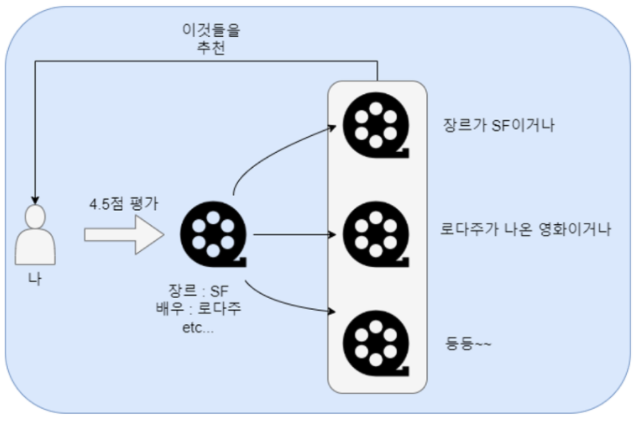
**컨텐츠 기반 추천의 장단점**
- 장점
    - 유저에게 추천을 할 때 다른 유저의 데이터가 필요하지 않다.
    - 새로운 아이템 혹은 인기도가 낮은 아이템을 추천할 수 있다.
    - 추천 아이템에 대한 설명(explanation)이 가능하다.
    
    
- 단점
    - 아이템의 적합한 피쳐를 찾는 것이 어렵다.
    - 한 분야/장르의 추천 결과만 계속 나올 수 있다(overspcialization)
    - 다른 유저의 데이터를 활용할 수 없다.

## 3.2 Item Profile
**Item Profile**

추천 대상이 되는 아이템의 feature들로 구성된 item profile을 만들어야 한다.
- 영화 : 작가, 제목, 배우, 장르, 감독
- 이미지, 동영상 : 메타데이터, 태그, 업로드한 사람
- SNS : 친구, 팔로잉/팔로워
    
아이템이 가진 다양한 속성(feature)을 어떻게 표현하면 가장 편할까? -> Vector 형태
- 하나의 feature가 1개 이상의 vector dimension에 표현된다.
- vector는 이진값 혹은 실수값으로 구성된다.


**Item Profile : TF-IDF for Text Feature**

문서(documnet)의 경우, 중요한 단어들의 집합으로 표현할 수 있다.

단어에 대한 중요도를 나타내는 스코어가 필요하다 -> 가장 많이 쓰는 기본적인 방법은 **TF-IDF**

- TF-IDF(Term Frequency - Inverse Documnet Frequency)
    - 문서 d에 등장하는 단어 w에 대해
    - 단어 w가 문서 d에 많이 등장하면서(Term Frequency, TF)
    - 단어 w가 전체 문서(D)에서는 적게 등장하는 단어라면(Inverse Document Frequency, IDF)
    - 단어 w는 문서 d를 설명하는 중요한 feature로, TF-IDF값이 높다.

**TF-IDF Formula**

$TF-IDF(w,d) = TF(w,d)\cdot IDF(w)$

- TF : 단어 w가 문서 d에 등장하는 횟수
    - $TF(w,d) = freq_{w,d}$
    - $TF(w,d) = \frac{(freq_{w,d}\ )}{\max_{k}(freq_{k,d}\ )}$ (normalize TF to discount 'longer' documnet)
    

- IDF : 전체 문서 가운데 단어 w가 등장한 비율의 역수
    - $IDF(w) = \log{\frac{N}{n_w}}$ (N : 전체 문서 개수, $n_w$ : w가 등장한 문서 개수)
    - IDF값의 변화가 크기 때문에 smoothing을 위해 logarithm을 사용한다.

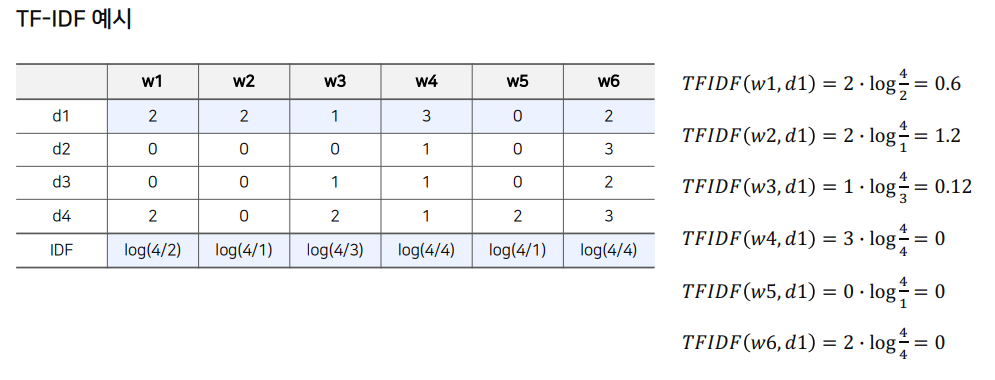
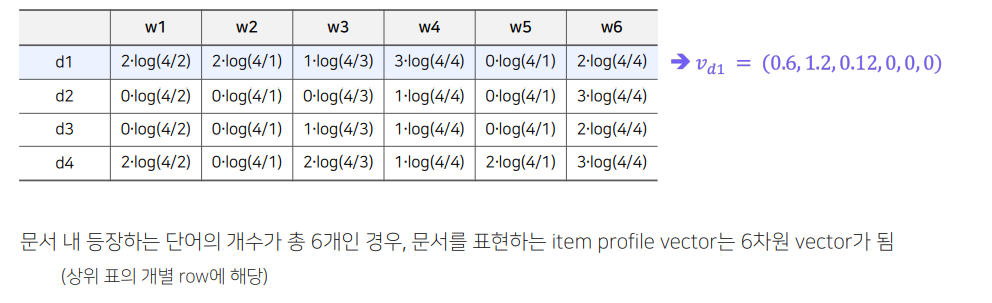

## 3.3 User Profile 기반 추천하기
**Build User Profile**

- Item Profile을 모두 구축했으나, 우리가 해야 할 일은 유저에게 아이템을 추천하는 것이다. -> User Profile 구축이 필요

- User Profile
    - 유저가 과거에 선호했던 Item List가 있고 개별 Item은 TF-IDF를 통해 벡터로 표현된다.
    - 각 유저의 Item List안에 있는 item의 Vector들을 통합하면 **User Profile**이 된다.
    - Simple : 유저가 선호한 Item Vector들의 평균값을 사용
    - Variant : 유저가 아이템에 내린 선호도로 정규화(normalize)한 평균값을 사용

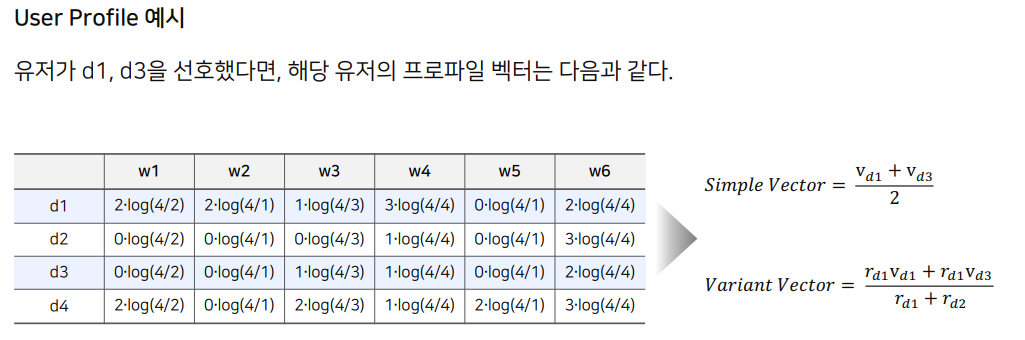


**Cosine Similarity**

- 주어진 두 벡터 X, Y에 대하여 $cos(\theta) = cos(X, Y) = \frac{X\cdot Y}{|X||Y|} = \frac{\sum_{i=1}^{N}X_iY_i}{\sqrt{\sum_{i=1}^{N}X_i^2}\sqrt{\sum_{i=1}^{N}Y_i^2}}$


- 두 벡터의 각도를 이용하여 구할 수 있는 유사도


- 직관적으로 두 벡터가 가리키는 방향이 얼마나 유사한지를 의미한다.
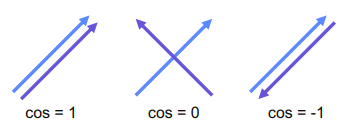

**유저와 아이템 사이의 거리 계산하기**

유저 벡터 u와 아이템 백터 i에 대해서 아래와 같이 거리를 계산한다.

$score(u,i) = cos(u,i) = \frac{u\cdot i}{|u|\cdot |i|}$

- 둘의 유사도가 클수록 해당 아이템이 유저에게 관련성이 높다.
- 해당 유저와 가장 유사한 아이템. 즉 $score(u, i)$가 가장 높은 아이템부터 유저에게 추천한다.

## 3.4 Rating 예측하기
**유저가 선호하는 아이템의 Vector를 활용하여 정확한 평점 예측하기**

유저 u가 선호하는 dkdlxpa $I=\{i_i,...,i_N\}$의 Item vector는 $V=\{v_1,...,v_N\}$, 평점은 $r_{u,i}$일 때, 새로운 아이템 $i'$에 대해서 평점을 예측해보자.

$i'$와 I에 속한 아이템 $i$의 유사도: $sim(i, i') = cos(v_i, v_{i'})$

$sim(i', i)$를 가중치로 사용하여 $i'$의 평점을 추론 : $prediction(i') = \frac{\sum_{i=1}^Nsim(i,i')\cdot r_{u,i}}{\sum_{i=1}^Nsim(i,i')}$

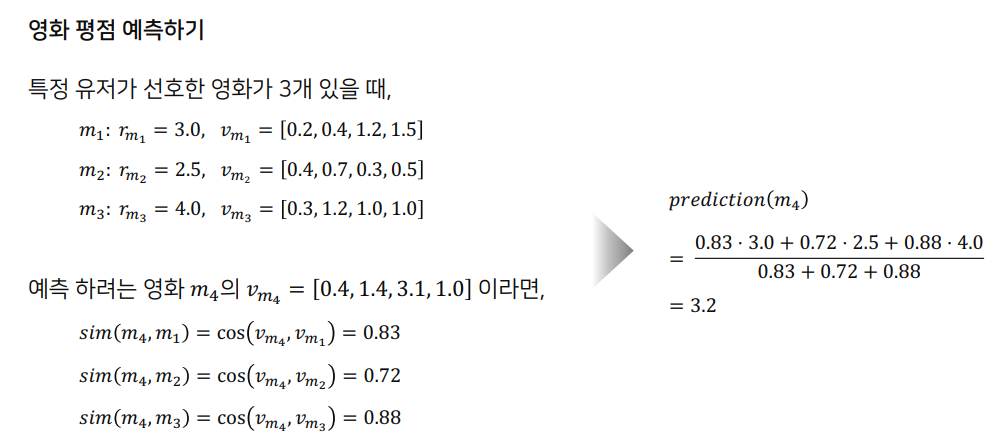